In [1]:
import matplotlib.pyplot as plt
import numpy as np
import sklearn
import sklearn.datasets
import matplotlib
import theano
import theano.tensor as T
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (8.0, 8.0)

In [2]:
def plot_decision_boundary(pred_func):
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    h = 0.01
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = pred_func(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Spectral)

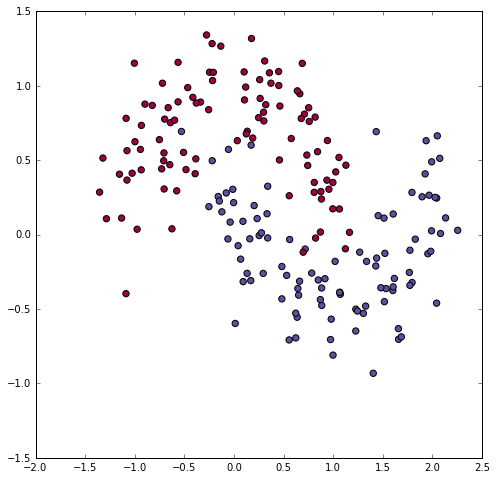

In [5]:
np.random.seed(0)
train_x, train_y = sklearn.datasets.make_moons(200, noise=0.20)
train_x = train_x.astype(np.float32)
train_y = train_y.astype(np.int32)
plt.scatter(train_x[:,0], train_x[:,1], s=40, c=train_y, cmap=plt.cm.Spectral)

In [10]:
N = train_x.shape[0]
num_inputs, num_outputs, num_hidden = train_x.shape[1], 2, 5
learning_rate = 0.01
lambda_reg = 0.01

X = T.matrix('X')
y = T.lvector('y')
W1 = theano.shared(np.random.randn(num_inputs, num_hidden) / np.sqrt(num_inputs), name='W1')
b1 = theano.shared(np.random.randn(1, num_hidden), name='b1')
W2 = theano.shared(np.random.randn(num_hidden, num_outputs) / np.sqrt(num_hidden), name='W2')
b2 = theano.shared(np.random.randn(num_outputs), name='b2')

z1 = X.dot(W1) + b1
a1 = T.tanh(z1)
z2 = a1.dot(W2) + b2
y_hat = T.nnet.softmax(z2)
loss_reg = 1.0 / N * 0.5 * lambda_reg * (T.sum(T.sqr(W1)) + T.sum(T.sqr(W2)))
loss = T.nnet.categorical_crossentropy(y_hat, y).mean() + loss_reg
prediction = T.argmax(y_hat, axis=1)

In [7]:
forward = theano.function([X], y_hat)
calculate_loss = theano.function([X, y], loss)
predict = theano.function([X], prediction)

NameError: name 'X' is not defined

In [4]:
dW1 = T.grad(loss, W1)
db1 = T.grad(loss, b1)
dW2 = T.grad(loss, W2)
db2 = T.grad(loss, b2)
dW1 += lambda_reg * W1
dW2 += lambda_reg * W2
update = theano.function([X, y], 
    updates=((W1, W1 - learning_rate * dW1),
             (W2, W2 - learning_rate * dW2),
             (b1, b1 - learning_rate * db1),
             (b2, b2 - learning_rate * db2)))

NameError: name 'loss' is not defined